# Tutorial II

In [1]:
%load_ext autoreload
%autoreload 2

import os
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('NVcenter')]+ 'NVcenter'
os.chdir(ROOT_DIR)

from NVcenter import *
plt.style.use('NVcenter-default')

import numpy as np 
import matplotlib.pyplot as plt
import qutip as q

In [11]:
C13_pos = (8.728883757198979e-10, 0.0, 1.8558998769620693e-10) # Dominik
register_config = [('NV', (0, 0, 0), 0, {}), ('C13', C13_pos, 0, {})]
filename = os.path.join('NVcenter', 'data', 'dominik_bath_small')
directory = os.getcwd()

bath_configs_nested = load_spin_baths(filename, directory)
bath_configs = [item for sublist in bath_configs_nested for item in sublist]

## Two Spin System

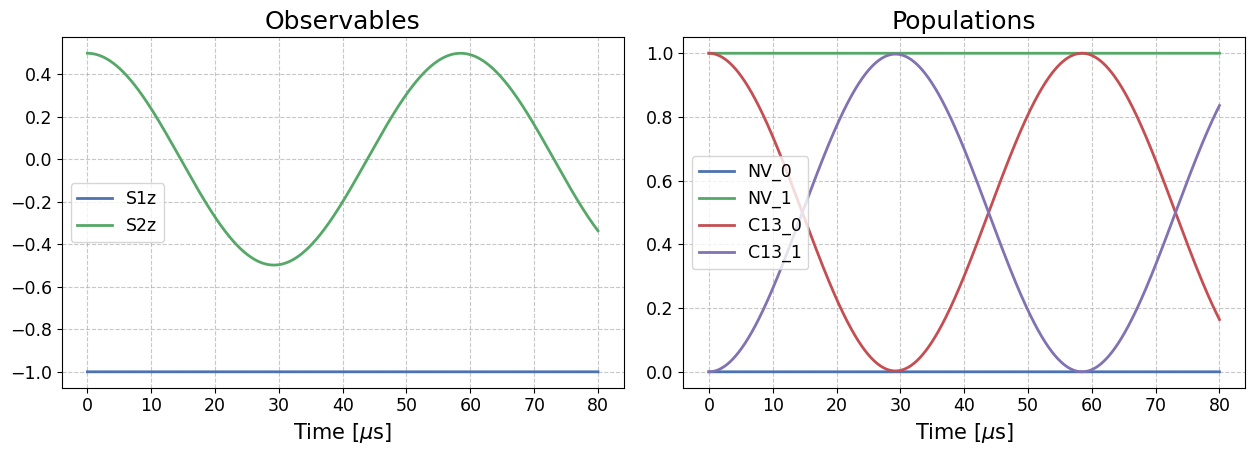

In [18]:
time = 80e-6
config_spin1 = ('NV', (0,0,0), 1, {})
config_spin2 = ('C13', C13_pos, 0, {})
two_spin_system = TwoSpinSystem(config_spin1, config_spin2, time, suter_method=kwargs['suter_method'])

fig, ax = plt.subplots(1, 2, figsize = (6.4*2, 4.8))
ax[0] = two_spin_system.plot_observables(ax[0], ['S1z', 'S2z'])
ax[1] = two_spin_system.plot_pops(ax[1])
plt.show()

## Random Spin Baths

In [19]:
# Fig. 3 in Dominik's paper (binomial distribution)

rmin, rmax = 0, 1.8e-9
volume = 4/3 * np.pi * (rmax**3 - rmin**3)

a_C = CONST['a_C'] # lattice constant for carbon
V_unit = a_C**3 # volume of the unit cell
N_unit = CONST['N_unit'] # number of carbon atoms per unit cell
n = N_unit/V_unit # density of carbon atoms
N =  int(volume * n) # number of carbon atoms

# Binomial distribution: abundancy is probability of finding a C-13 instead of a C-12
abundancies = np.arange(2, 11) * 0.005e-2
more_than_zero, more_than_one, more_than_two = [], [], []
for abundancy in abundancies: 
    zero_C13 = (1-abundancy)**N
    one_C13 = N * abundancy * (1-abundancy)**(N-1)
    two_C13 = N*(N-1)/2 * abundancy**2 * (1-abundancy)**(N-2)
    more_than_zero.append( 1- zero_C13 )
    more_than_one.append( 1- zero_C13 - one_C13 )
    more_than_two.append( 1- zero_C13 - one_C13 - two_C13 )

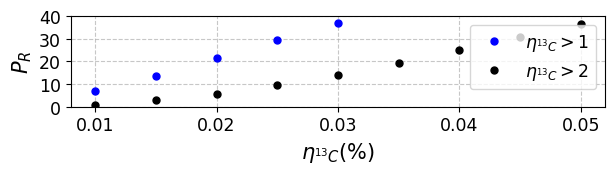

In [20]:
fig, ax = plt.subplots(figsize=(6.4, 4.8//2))

ax.plot(abundancies, more_than_one, 'b.', markersize=10, label=r'$\eta_{^{13}C}>1$')
ax.plot(abundancies, more_than_two, 'k.', markersize=10, label=r'$\eta_{^{13}C}>2$')

# plot settings
ax.set_ylabel(r'$P_R$')
ax.set_xlabel(r'$\eta_{^{13}C} (\%)$')
ax.set_ylim(0, 0.4)
# ax.set_xlim(0.01e-2, 0.05e-2)
ax.legend()
ax.set_xticks([0.01e-2, 0.02e-2, 0.03e-2, 0.04e-2, 0.05e-2], [0.01, 0.02, 0.03, 0.04, 0.05])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4], [0, 10, 20, 30, 40])

plt.show()